### Importing Necessary Liabraries

In [82]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

### Data Loading from Keras

In [83]:
mnist=tf.keras.datasets.mnist #28x28 pixles handwritten images

## To see the pictures

In [84]:
data=mnist.load_data()

### Matrix represenation of images

In [85]:
(x_train, y_train), (x_test, y_test) =data

In [86]:
# y_train.shape

### Splitting the data using Train_test_split

In [87]:
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

train_size = 0.8
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=train_size)

### Showing an image using Matplotlib

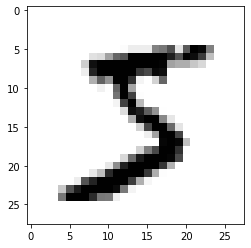

In [88]:
plt.imshow(x_train[0],cmap=plt.cm.binary)

### Creating Models and Layers

In [89]:
model=tf.keras.models.Sequential()

In [90]:
## Adding Input layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) #Creating Dense layers hidden
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) #Creating Dense layers hidden
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) #Creating output layer 10- no of outputs
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6232 - accuracy: 0.8780
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3494 - accuracy: 0.9284
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2286 - accuracy: 0.9433


### Model Evaluation

In [100]:
model_loss,model_acc=model.evaluate(x_test,y_test)
print(" Model Loss is {} \n Model Accuracy is {}".format(model_loss,model_acc),sep='')

313/313 [==============================] - 1s 2ms/step - loss: 0.2152 - accuracy: 0.9468
 Model Loss is 0.2151816338300705 
 Model Accuracy is 0.9467999935150146


###  Save the model

In [101]:

model.save('mnist.model')

INFO:tensorflow:Assets written to: mnist.model/assets


### Importing the model

In [104]:
new_model=tf.keras.models.load_model('mnist.model')

### shape of x_test

In [111]:
x_test.shape

(10000, 28, 28)

### x_test contains some tensors of numerbers we will use them for prediction

In [105]:
pred=new_model.predict([x_test])

### After Predcition it may lookslike hazy

In [106]:
pred

array([[9.6822723e-12, 7.5258013e-09, 2.5912982e-07, ..., 9.9997032e-01,
        2.7151150e-06, 6.2245754e-06],
       [2.0979938e-16, 1.0080250e-09, 1.0000000e+00, ..., 3.7749474e-11,
        2.5342406e-14, 2.4167493e-15],
       [2.1031199e-17, 9.9999571e-01, 6.6586299e-11, ..., 4.2376714e-06,
        2.3411593e-08, 6.2629723e-12],
       ...,
       [3.0942019e-08, 3.9548172e-06, 1.3261830e-08, ..., 7.2727707e-05,
        5.6296223e-05, 4.1390181e-04],
       [2.6146771e-09, 7.6178879e-02, 6.4893442e-08, ..., 1.9344940e-10,
        3.8256100e-01, 2.7119771e-05],
       [1.5906987e-13, 1.0740305e-12, 1.9670896e-16, ..., 6.4335190e-17,
        2.9419089e-13, 7.6306352e-19]], dtype=float32)

### That's why we will use argmax to fetch the output

In [107]:
np.argmax(pred[0])

7

### It is showing that the number at x_test[0] seems to be 7 .

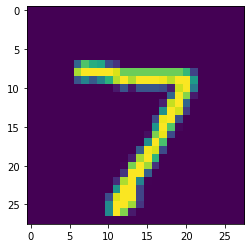

In [108]:
plt.imshow(x_test[0])

In [ ]:
### After checking it is showing 7.